## Comparing two 1D discrete distributions. Example

We would like to know which distribution d1 or d2 is closer to distribution u.
The correct answer here should be that distribution d is closer to u, because it covers the same area the u covers, whereas d2 only exists in the middle of the u (explanation in very simple English :))


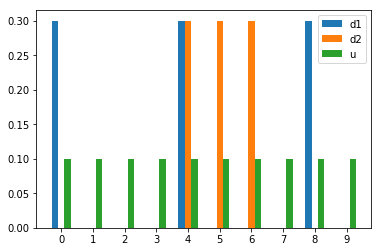

In [20]:
import numpy as np
import matplotlib.pyplot as plt

# small value
sm = 1e-09
d1 = np.repeat(sm, 10)
d1[[0,4,8]]= 0.3
d2 = np.repeat(sm, 10)
d2[[4,5,6]] = 0.3

u = np.repeat(0.1, 10)

## plotting
ind = np.arange(10)
w = 0.2
d1_plot = plt.bar(ind - w, d1, width = w, align='center')
d2_plot = plt.bar(ind, d2, width= w, align='center')
u_plot = plt.bar(ind + w, u, width= w, align='center')
plt.legend( (d1_plot[0], d2_plot[0], u_plot[0]), ('d1', 'd2', 'u') )

objects = list(map(str, range(10)));
plt.xticks(ind, objects);


### Kullback-Leibler divergence

Compares two distribution. Non commutative, thus not a metric.
The smaller the value is the more similar two distribution are.

$$ D_{KL}(p || q) = \sum_{i=0}^N p(x_i) \mathrm{log}\frac{p(x_i)}{q(x_i)} $$

In [21]:
def KLDivergence(p,q):
    logTerm = np.log2(np.divide(p,q))
    d = np.sum(np.multiply(p,logTerm))
    return d

Before the KL divergence could be applied to the discreet distributions, they should be convolved with gaussian kernel. They should be made more smooth. Otherwise in the given example the value of the divergence is the same for <d1,u> and <d2,u>, since they have the same number of bins of the same height. However, since the location of the bins are not the same, the smoothed version will populate the difference nearby bins. I am more than sure that there is a sane mathematical explanation behind this smoothness action, but I don't know it yet :)

### Convolving with gaussian
you need to create a Gaussian that's discretized at the same spatial scale as your curve, then just convolve.
Specifically, say your original curve has N points that are uniformly spaced along the x-axis
Then the point spacing along the x-axis will be (physical range)/(digital range) = (10 -0)/N

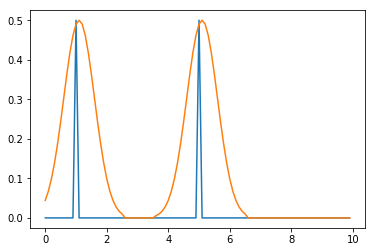

In [22]:
def convolve1D(y, sigma, discr):
    gx = np.arange(-3*sigma, 3*sigma, discr)
    gaussian = np.exp(-(gx/sigma)**2/2)
    z = np.convolve(y, gaussian, mode="same")
    return z

x = np.arange(0,10, 0.1)
y = np.repeat(sm, x.shape[0])
y[[10,50]] = 0.5

z = convolve1D(y, 0.5,0.1)

plt.plot(x,y)
plt.plot(x, z)
plt.show()


In [13]:
sigma = 0.2
d1_blurred = convolve1D(d1, sigma, 1)
d2_blurred = convolve1D(d2, sigma, 1)


#normalize to make it a probability distribution after the convolving
d1_blurred = d1_blurred / np.sum(d1_blurred)
d2_blurred = d2_blurred / np.sum(d2_blurred)

print KLDivergence(d1_blurred,u)
print KLDivergence(d2_blurred,u)

1.3495510787832004
1.6078272976845267
